# Jupyter for Mathematics Classes

## What is Jupyter?

*Jupyter* is primarily an interactive shell for Python with some additional functionality, mainly a *markdown* language syntax for cells that allows one to wrap Python code cells with descriptive text with some formating options. *Markdown* is a What You See Is What You Get (WYSIWYG) language for typsetting similar to the language used by Wikipedia. For our purposes, the most important feature is that it includes escape environments for typesetting mathematical expressions in $\LaTeX$ in line and as equations:

$$ \int x^2 dx = 2 x + C $$

- There are commands for bullets and numeration;
- **Bold**, *Italics*, and ~Strikeout~
- [html tags](https://virgilpierce.github.io/frontmatter-1.html)
- Section and subsection headings (see above)
- Importing images (using an HTML / XML type of syntax)

<img src="IMG_4020.jpg" style="width:200px">

- A quote environment (see below)

and probably some other options I have not discovered yet.

Jupyter functions as a webserver either on your local machine or running through a cloud service called a Jupyter Hub. More about Jupyter Hubs at the end.

### Okay so what is Python?

If you have not seen Python before, today's presentation will be a gentle introduction. From the Python Foundation's website:

> Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data  structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together. 

As someone who is realitvely new to the language I can say that my experience has been:  

1. it is a powerful yet easy to learn language with far fewer things that need to be front loaded compared to C++ (no declarations), 
2. it is much easier to read Python code than other languages (in fact this is a primary focus of the design decisions),
3. the interactive environment (like we are using in Jupyter) makes it behave like matlab (you can run a command and then see what happens), 
4. it was written by a mathematician, and is used extensively for computations in math and science,
5. its plotting functions use the same syntax as matlab: plot( x, y, 'b-' )
6. it is free and open (beer and liberty)

Downsides, as a programing language are the obvious

1. Because it is not a compiled language like C++ it is substantially slower,
2. Because it is more of a programing language than matlab, you may need to worry about the structure of variables and what they represent at some point.

I assert, and will try to show you here, that we can insulate students from the issues that occur with downside 2. Downside 1 should not be an issue in most of the cases I have in mind for a class. In my work, 1 has only been an issue in some combinatorial problems where I am trying to iterate over all permutations of size $n > 12$.


## Why use a tool like Jupyter/Python

A major frustration in my teaching has been when I ask students to use a tool that I know is unrelated to what they would use in the 'real-world', in their careers, or in other classes. 

- **Python has evolved to be a major tool used in STEM, from small minor tasks to major research projects**. 
- **Jupyter/Python is a very common tool for Data Science in industry and were identified as important for candidates to have experience with**

I also find that programming languages do have some things in common with human languages, and one of those commonalities is that if you do not use it, you will lose it. 

- **Asking students to use and interact with Python outside of a their programming class will improve their understanding of the language**

But its not just for students who have had a Python class, it is possible to design your course materials to function as a gentle introduction to the language, similarly to how matlab or mathematica can be introduced to students:

- **The language is human readable**
- **With Jupyter, the code that students see can be wrapped in detailed explanations**
- **With Jupyter, hyperlinks to even more details can be added**
- **I will show you some techniques for 'locking' cells to limit what students can change in a notebook, allowing you to create worksheets and interactive notebooks that will be hard(er) for students to 'break'**

### My own personal journey

I am very much aware that my experiences are not those of my students. In fact it is incredibly frustrating that I visited many schools in South Texas that had fewer computers per student in 2012 than my own high school did in 1992. That said, part of my enthusiasm for tools like Jupyter / Python is from my own personal experience being a student.

#### Some pre-history

Our story starts in a small school district in rural Vermont: our protagonist was a mediocre 'C' student in mathematics who spent most of his time reading pulp fantasy and science-fiction, when he was not wandering around the woods. 

Then the school receives its first ever set of classroom computers (1992). A group of students, including the protagonist, joins the school librarian in working their way through learning Pascal. 

I believe I can still remember this moment accurately: One day, in learning about writing functions, there is a loud audible *click* sound (I wouldn't be surprised if the librarian said "What was that noise?").  I suddenly got what a function in my math class was. 

The question *How would we have a computer do this?* began to permeate all of my thinking about mathematics (I probably drove some teachers crazy). There were a few bumps along the way, but if you were to look into one of my notebooks from graduate school, my research notes from my post-doc, and througout my lesson plans you will see this question again and again. It became for me a fundamental underpinning of my thinking and understanding.

In fact, I think one of my struggles with real analysis was that this question became very hard to give good answers to.

#### OSU - Linear Algebra for Engineers

In my second year at Ohio State, I was assigned their *Linear Algebra for Engineers* course. A course for engineering majors that also served as the *introduction ot matlab* for them. The course was designed by David Terman using an open source *Introduction to Matlab* he had made.

- The course moved at what to a *Linear Algebra for Mathematicians* instructor would probably be called an fast pace, 
- The reason for the pace, is that Dr. Terman had the goal of getting to what he considered *The most improtant fact about Linear Algebra that engineering students need to know*:

> Solving a well posed linear system propogates errors, the resulting errors can be estimated with the condition number of the matrix of coefficients. 

This result is underpinned by the Singular Value Decomposition of a matrix and is typically derived in a second course or a graduate course in Linear Algebra or is just presented as a formula for an engineering class. We split the difference in this class, we derived it in class but then used matlab to compute it and work with it. 

Compared to my undergraduate *Linear Algebra* the course emphasized non-square matrices, matrices that were much larger than $3\times 3$, and the difference between exact and approximate results.

#### So what would a Linear Algebra with Python Look Like



In [125]:
import numpy as np  # numpy is a set of computational tools for numerical results
import numpy.linalg as la  # numpy.linalg are some linear algebra specific tools
import sympy as sy # sympy is a set of symbolic computational tools for exact results
import matplotlib.pyplot as plt # A set of plotting tools

In [23]:
# For numpy tools, matrices are arrays

A = np.array( [ [1, 1, 2], [1, 1, 1], [2, 1, 1]])
print(A)

[[1 1 2]
 [1 1 1]
 [2 1 1]]


In [13]:
v = np.array( [ [-1, 1, 3]]).transpose()  
# As with matlab and mathematica it is annoyingly easy to enter row-vectors compared with column-vectors
print(v)

[[-1]
 [ 1]
 [ 3]]


In [14]:
# students can multiply matrices using Python

print( A @ v )

[[6]
 [3]
 [2]]


Students (and you) will come face-to-face with the problem that exact results and numerical results are different things. In Python they use separate packages. See below on *Computational Linear Algebra*.

In [31]:
# sympy Matrices can be made from numpy arrays. They include a nice display format.

AA = sy.Matrix( [[1, 1, 1, 2, -2, 4], [2, 2, 3, 1, -1, 5], [-1, -1, 1, 1/2, -1/2, 1]])
AA

Matrix([
[ 1,  1, 1,   2,   -2, 4],
[ 2,  2, 3,   1,   -1, 5],
[-1, -1, 1, 0.5, -0.5, 1]])

In [32]:
# We can compute the rref of a matrix

AA.rref()

(Matrix([
 [1, 1.0, 0, 0,    0, 0.529411764705882],
 [0,   0, 1, 0,    0, 0.882352941176471],
 [0,   0, 0, 1, -1.0,  1.29411764705882]]), (0, 2, 3))

Note that we get two items, the first is the rref, the second is a list of the columns with pivots.

In [33]:
AA.rref()[0] # We can pull out the result by referencing the first item in the tuple.

Matrix([
[1, 1.0, 0, 0,    0, 0.529411764705882],
[0,   0, 1, 0,    0, 0.882352941176471],
[0,   0, 0, 1, -1.0,  1.29411764705882]])

So early in the course, Python gives us a nice way for students to do the computations we are doing. 

- I would have students using Elementary Matrices to encode row operations as we build up to RREF.
- Because they are using the computer for the computations we can use much larger problems than we would by hand
- With much larger problems, much more interesting things happen
- We are letting the computer do what it is good at - arithemetic, so students can do what they are best at - thinking.

#### Computational Linear Algebra

The real power of these kinds of tools in a *Linear Algebra* class comes out when we get to eigenvalues and beyond (which in my classes would be a fair bit earlier than in a non-computer class).

The first method of computing eigenvalues that we typically introduce is as solutions of the polynomial equation 

$$ \mbox{det}(A - \lambda I) = 0 $$

Which is important as it is emphasizing the use of the determinant for determining singularity, eigenvectors as elements of a nullspace, and the eigenvalues as parameters creating a nullspace.

However some important points that we usually gloss over at this point in the course: General solutions to these polynomials are only gaurunteed for an $A$ that is $n\times n$ with $n \leq 4$ and most of us only have the formula memorized for $n\leq 2$. Once $n$ is bigger than 4 solving this equation would be done using something like Newton's method which is slow compared to direct methods.

Now I would not teach students what some of those direct methods are, but we would discuss this issue and then begin using the routines in numpy.

#### Eigenvalue Lesson

We first introduce students to Eigenvalues via experimentation with a Markov matrix

In [105]:
M = np.array([0, 0, 0.5, 0, 0.5,
              0, 0, 1, 0, 0,
              0.25, 0.25, 0, 0.25, 0.25,
              0, 0, 0.5, 0, 0.5, 
              0, 0, 0,   0, 1]).reshape(5,5).transpose()
print(M)

[[0.   0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.5  1.   0.   0.5  0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.5  0.   0.25 0.5  1.  ]]


Take a random vector $v$ and repeatedly apply $M$ (Markov matrices encode for instances how a population is moving between a set of cities at each time step).

In [107]:
v = np.array([ [0.2, 0.2, 0.2, 0.2, 0.2]]).transpose()
print( M @ v)

[[0.05]
 [0.05]
 [0.4 ]
 [0.05]
 [0.45]]


In [108]:
print( la.matrix_power(M, 2) @ v)

[[0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.6]]


In [119]:
v0 = la.matrix_power(M, 100) @ v  # Note the 100th power of a matrix, we would not compute by hand
print(v0)

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [120]:
print(M @ v0)

# 1 is an eigenvalue of M with eigenvector v0.

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [121]:
print(la.eig(M)[0])

[ 1.         -0.70710678 -0.          0.70710678  0.        ]


Note that algorithms for computing eigenvalues are so good, they provide an effective means of calculating zeros of polynomials via the companion matrix:

In [47]:
A = np.array( [ [0, 1, 0, 0, 0, 0], 
               [0, 0, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 0], 
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1], 
               [192, -64, -156, 4, 25, 0]])
print(A)

[[   0    1    0    0    0    0]
 [   0    0    1    0    0    0]
 [   0    0    0    1    0    0]
 [   0    0    0    0    1    0]
 [   0    0    0    0    0    1]
 [ 192  -64 -156    4   25    0]]


In [57]:
out = la.eig(A)
print(out[0].round(5))

[-4.+0.j  4.+0.j  3.+0.j -2.+0.j -2.-0.j  1.+0.j]


In [49]:
x = sy.symbols('x')
sy.expand((x+4)*(x-4)*(x-3)*(x+2)*(x+2)*(x-1))

x**6 - 25*x**4 - 4*x**3 + 156*x**2 + 64*x - 192

#### Linear Regression

Suppose we have a collection of data points $(x_i, y_i)$ and we would like to find the best Linear Model $y = m x + b$ fitting this data. By best we mean minimizing some error, and a common choice of error is the sum of the squares of the residuals.  Let $\hat{y}_i = m x_i + b$ for some choice of $m$ and $b$:

$$ E(m, b) = \sum_{j=0}^{n-1} (\hat{y}_i - y_i)^2 $$

The reason for this choice of error is that this problem can be solved via Calculus by computing the partial derivatives of $E$ in the directions of $m$ and $b$ and setting them both to zero. Because $E$ is quadratic, these partial derivatives are linear functions of $m$ and $b$ and thus can be solved via matrix multiplication. 

$$ \frac{\partial E}{\partial m} = \sum_{j=0}^{n-1} 2 ( \hat{y}_i - y_i ) x_i = 0 $$
$$ \frac{\partial E}{\partial b} = \sum_{j=0}^{n-1} 2 ( \hat{y}_i - y_i ) = 0 $$

As a matrix equation this system is

$$ A \begin{pmatrix} m \\ b \end{pmatrix} = C $$

where 

$$ A = \begin{pmatrix} 2 \sum x_i^2 & 2 \sum x_i \\ 2 \sum x_i & 2 n \end{pmatrix} $$
and
$$ C = \begin{pmatrix} 2 \sum x_i y_i \\ 2 \sum y_i \end{pmatrix}$$

One can check that under some reasonable conditions (satisfied by generic $x_i$) the matrix $A$ is invertible and we have 

$$ \begin{pmatrix} m \\ b \end{pmatrix} = A^{-1} C $$


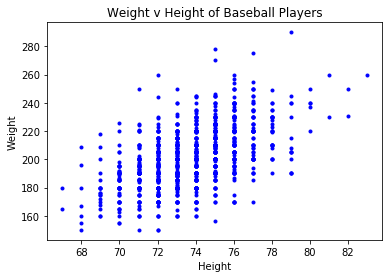

In [153]:
import pandas as pa  # I need a module that contains a function for reading a csv file
bp = pa.read_csv('Major League Height-Weight.csv')
bp = bp.drop( bp[pa.isna(bp['Weight(pounds)'])].index.values )  
# This is a real data set which means it has some missing values

X = bp['Height(inches)']
Y = bp['Weight(pounds)']
plt.plot(X, Y, 'b.')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight v Height of Baseball Players');

In [154]:
A = np.array( [ 2*sum(X**2), 2*sum(X), 2*sum(X), 2*X.shape[0]]).reshape(2,2)
print(A)

[[11232526   152262]
 [  152262     2066]]


In [155]:
C = np.array( [2*sum(X*Y), 2*sum(Y)]).reshape(2, 1)
print(C)

[[30762758.]
 [  416690.]]


In [165]:
out = la.inv(A) @ C
print( out )

[[   4.84105896]
 [-155.09163607]]


In [166]:
m, b = out[0, 0], out[1, 0]
m, b

(4.841058964982949, -155.09163607278606)

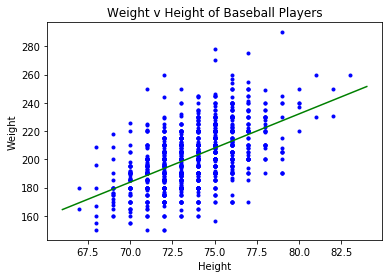

In [167]:
plt.plot(X, Y, 'b.')

xx = np.linspace(66, 84, 20)
yy = m*xx + b
plt.plot(xx, yy, 'g-')


plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight v Height of Baseball Players');

#### Singular Value Decomposition

We can motivate singular value decomposition from the eigenvalue decomposition of symmetric matrices, and then rely on the numpy.linalg routine to implement it. Note singular value decomposition is a fundamental result for many applications, yet is usually not reached by an undergraduate course.

A symmetric matrix is guarunteed to have real eigenvalues and a set of eigenvectors that form an orthogonal (and after normalization) orthonormal basis. 

$$ A = Q D Q^T $$

In many examples coming from applications, such as Data Science, the matrices we get are highly non-square with either many more rows than columns or vice versa. 